# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [2]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv")

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [3]:
#Seu código aqui para a média
df.groupby('Categoria')['Preco_Normal'].mean().round(2).reset_index().sort_values('Preco_Normal', ascending=False)
# Agrupa o df por categoria e cálcula a média de 'Preco_Normal' de cada um(arredondado para duas casas decimais e mostrado em ordem descrecente) 

,Categoria,Preco_Normal
1,comidas-preparadas,3095.04
5,lacteos,2385.22
2,congelados,2108.04
0,belleza-y-cuidado-personal,1783.56
3,frutas,1724.47
6,verduras,1343.30
4,instantaneos-y-sopas,765.49


In [4]:
#Seu código aqui para a mediana
df.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values('Preco_Normal', ascending=False)
# Agrupa o df por categoria e evidencia a mediana de 'Preco_Normal' de cada um(mostrado em ordem descrecente)

,Categoria,Preco_Normal
1,comidas-preparadas,3290.0
0,belleza-y-cuidado-personal,1569.0
2,congelados,1519.0
3,frutas,1195.0
6,verduras,1180.0
5,lacteos,989.0
4,instantaneos-y-sopas,439.0


# Digite aqui as categorias:

**Categorias com Média pouco maior que a Mediana:** *'belleza-y-cuidado-personal', 'verduras', 'instataneos-y-sopas'*
Os valores da média das categorias acima são levemente maiores que a mediana(diferença de **200 à 300**), o que indica uma pequena assimetria para direita, porém não é tão evidente a ponto de serem outliers

**Categorias com Média muito maior que a Mediana:** *'congelados', 'frutas', 'lacteos'*

Os valores da média das categorias acima são consideravelmente maiores que a mediana(diferença de **600 à 1400**), gerando uma grande assimetria para direita, o que indica a presença de outliers com preços que elevam muito a média e, portanto, devem ser analisados

**Categorias com Média menor que a Mediana:** *'comidas-preparadas'*

O valor da média da categoria acima é a única com média menor que a mediana(diferença de **200**), causando apenas uma leve assimetria para esquerda, não tão significativa para revelar a presença de outliers

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [5]:
#Seu código aqui
df.groupby('Categoria')['Preco_Normal'].std().round(2).reset_index().sort_values('Preco_Normal', ascending=False)
# Agrupa o df por categoria de produto e cálcula o desvio padrão de 'Preco_Normal' de cada um(arredondado para duas casas decimais e mostrado em ordem descrecente)

,Categoria,Preco_Normal
5,lacteos,3925.82
0,belleza-y-cuidado-personal,2210.04
2,congelados,2111.54
1,comidas-preparadas,2019.91
3,frutas,1639.15
4,instantaneos-y-sopas,1170.23
6,verduras,1012.70


# Digite nesse campo o comportamento que você identificou.

Categoria **'lacteos'**: Essa categoria possui o maior desvio padrão e, similarmente, possui a maior diferença entre média **(2385)** e mediana **(989)**, o que signfica que há uma grande chance de haverem outliers 

Categorias **'belleza-y-cuidado-personal'**, **'congelados'** e **'comidas-preparadas'**: Enquanto a categoria 'lacteos' possui um desvio padrão de **3925**, essas outras 3 maiores categorias possuem um desvio padrão significamente menor que esse e similar entre si, sendo os valores **2210**, **2111**, **2019**. Contudo, enquanto a categoria 'congelados' demonstrou uma grande diferença entre média **(2108)** e mediana **(1519)**, as categorias 'belleza-y-cuidado-personal'e 'comidas-preparadas' mostraram uma diferença bem menor em comparação, com médias de **1783** e **3095** e medianas de **1569** e **3290**, o que pode indicar que enquanto a primeira análise comparando esses 2 valores não deu altos indícios da presença de outliers, essa segunda análise indica o oposto. 

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

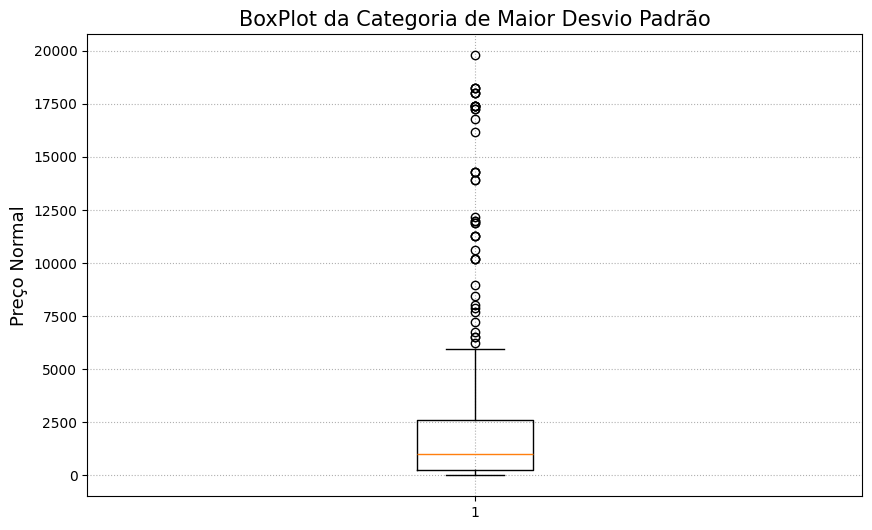

In [6]:
#Seu código aqui
df_maior_desvio = df.loc[df['Categoria'] == 'lacteos'] # Cria um df apenas com os dados com categoria 'lacteos', que indica maior desvio (.loc é responsável por encontrálos)

plt.figure(figsize=(10, 6)) # Define o tamnaho do gráfico
plt.boxplot(df_maior_desvio['Preco_Normal']) # Cria o gráfico de barras usando as categorias como eixo x e a média de desconto como eixo y 
plt.title('BoxPlot da Categoria de Maior Desvio Padrão', fontsize=15) # Define o título do gráfico e tamanho da fonte
plt.ylabel('Preço Normal', fontsize=13) # Define o nome do eixo Y
plt.grid(True, linestyle='dotted')
plt.show()


# Análise do Gráfico:

A distribuição dos preços do produtos na categoria com maior desvio padrão (lacteos) evidencia que existem muitos outliers com valores tanto um pouco maiores quanto bem maiores do que o esperado. Com isso, confirmamos o que descobrimos com o desvio padrão, bem como com a diferença entre média e mediana dessa categoria e, portanto, um tratamento adequado deve ser realizado para que futuras pesquisas com esses dados possam ser factuais.

# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

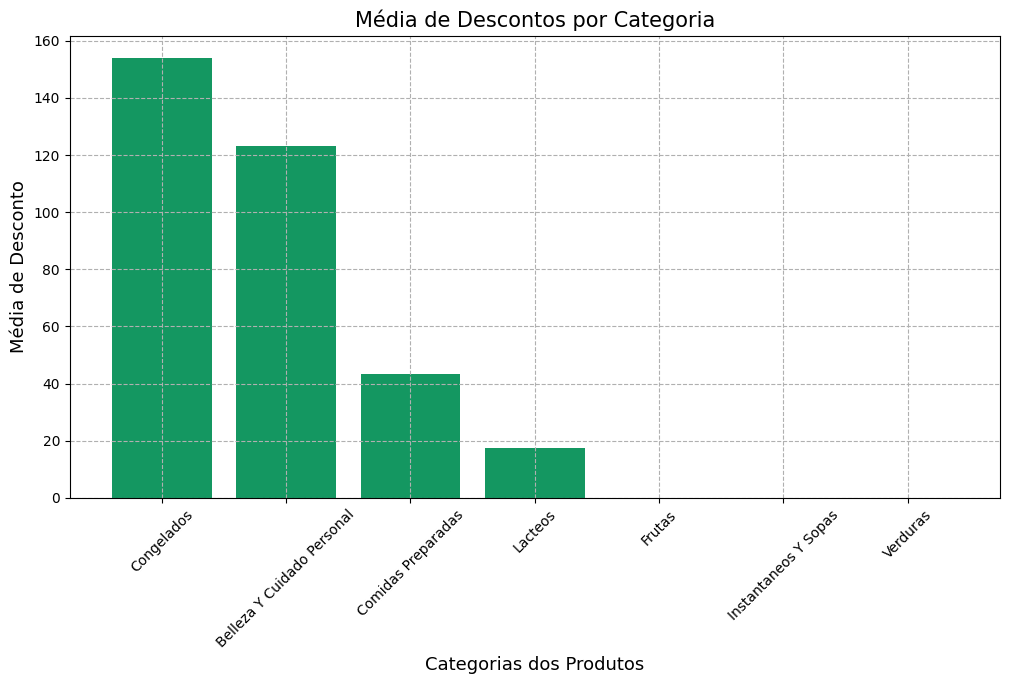

In [7]:
# Seu código aqui
df_descontos_categoria = df.groupby('Categoria')['Desconto'].mean().sort_values(ascending=False)
# Cria um novo df que agrupa as categorias e cáclcula a média de desconto de cada uma, ordenado de forma descrescente
df_descontos_categoria.index = df_descontos_categoria.index.str.replace('-', ' ').str.title()
# Tratamento do índice para que a sua visualização no gráfico fico menos confusa e mais compreensível

plt.figure(figsize=(12, 6)) 
plt.bar(df_descontos_categoria.index, df_descontos_categoria, color="#149761") # Cria o gráfico de barras usando as categorias como eixo x e a média de desconto como eixo y 
plt.title('Média de Descontos por Categoria', fontsize=15) 
plt.xlabel('Categorias dos Produtos', fontsize=13) # Define o nome do eixo X
plt.ylabel('Média de Desconto', fontsize=13)
plt.xticks(rotation=45) # Rotaciona o ângulo dos rótulos de categoria para melhor visualização
plt.grid(True, linestyle='--') # Define o grid do gráfico
plt.show() # Mostra o gráfico


# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [8]:
# Seu código aqui
df_categoria_marca = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().round(2).reset_index()
# Cria um novo df que agrupa as categorias e as marcas e cáclcula a média de desconto de cada uma
df_categoria_marca['Categoria'] = df_categoria_marca['Categoria'].str.replace('-', ' ').str.title()
# Tratamento das categorias para que a sua visualização no gráfico fico menos confusa e mais compreensível

fig = px.treemap(df_categoria_marca, # Cria o gráfico de mapa de árvore interativo, usando o df criado na linha acima
                path=['Categoria', 'Marca'], # Define quais as colunas do df que formam os blocos do gráfico
                values='Desconto', # Define quais valores a serem mostrados nos blocos, definem o tamanho de cada um de acordo com seu valor
                title='Média de Descontos por Categoria e Marca', # Define o título do gráfico
                color='Categoria') # Define a cor dos blocos de acordo com cada categoria no df

fig.update_traces(root_color="lightgrey") # Altera a cor raiz do gráfico

fig.update_layout(margin = dict(t=50, l=25, r=25, b=25)) # Altera o tamanho do gráfico

fig.show() # Mostra o gráfico